# 初始化

In [1]:
import sys
import os
import pandas as pd
os.chdir('data4')
from inits import initialize,ans
res = initialize("answer-4.txt")

***************正在初始化***************
*************读取到配置文件*************
***************初始化成功***************


# 加载数据

In [218]:
import pandas as pd
df = pd.read_excel("2020年中国大学排名.xlsx")

## 1.查看数据

In [9]:
df.head(2)

,排名,学校名称,省市,学校类型,总分,办学层次得分,学科水平得分,办学资源得分,师资规模与结构得分,人才培养得分,科学研究得分,社会服务得分,高端人才得分,重大项目与成果得分,国际竞争力得分
0,1,清华大学,北京,综合,852.5,38.2,72.4,39.6,48.4,256.8,69.1,40.6,76.5,131.0,79.9
1,2,北京大学,北京,综合,746.7,36.1,73.1,24.6,49.2,237.6,71.0,16.2,71.9,105.8,61.2


### 2 修改索引

In [16]:
# 创建示例数据框  
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie'], 'age': [25, 30, 35]})  
  
# 设置索引  
# df.set_index('name', inplace=True)  
  
# 重新设置索引  
# df.reset_index(inplace=True)
# 将索引重命名为 'names'  
df.rename_axis('names', axis=0, inplace=True)

### 3 - 查看数据量

In [20]:
# 查看数据量  
size = df.shape[0] * df.shape[1]  
print(f"数据量为：${df.shape[0]} \\times {df.shape[1]} = {size}$")
# df.shape 返回数据框的行数和列数，分别存储在 df.shape[0] 和 df.shape[1] 中。通过将行数和列数相乘，即可得到数据框的总单元格数量。

数据量为：$100 \times 15 = 1500$


### 4 - 数据排序

In [25]:
# df_sorted = df.sort_values(by='总分', ascending=True)  
df_sorted = df.sort_values(by='高端人才得分', ascending=False)
df_sorted = df_sorted.head(20)  
# print(df_sorted)

### 6 - 分列排名

In [35]:
# 按照得分降序排列  
df_sorted = df.sort_values(by='总分', ascending=False)  
  
# 获取排名第一的学校名称  
top_school = df_sorted.iloc[0]['学校名称']  
  
# 按照各项得分进行分列排名  
df_ranked = df.pivot_table(values='总分', index='学校名称', columns='学校类型', fill_value=0, margins=True, margins_name='Total')  
  
# 打印结果  
df_ranked
# top_school

学校类型,农业,师范,林业,理工,综合,Total
学校名称,,,,,,
上海交通大学,0.00,0.00,0.0,0.000000,625.900000,625.9
上海大学,0.00,0.00,0.0,0.000000,290.000000,290.0
上海师范大学,0.00,212.80,0.0,0.000000,0.000000,212.8
上海理工大学,0.00,0.00,0.0,221.400000,0.000000,221.4
上海科技大学,0.00,0.00,0.0,0.000000,261.500000,261.5
...,...,...,...,...,...,...
重庆大学,0.00,0.00,0.0,0.000000,320.900000,320.9
长安大学,0.00,0.00,0.0,218.900000,0.000000,218.9
陕西师范大学,0.00,239.90,0.0,0.000000,0.000000,239.9


### 7 - 统计信息｜均值

In [34]:
# 计算总分列的均值  
total_score_mean = df['总分'].mean()  
  
# 打印结果  
print(f"总分列的均值为：{total_score_mean}")

总分列的均值为：322.5


### 8 - 统计信息｜中位数

In [37]:
# 计算总分列的中位数  
total_score_median = df['总分'].median()  
  
# 打印结果  
print(f"总分列的中位数为：{total_score_median}")

总分列的中位数为：279.65


### 9 - 统计信息｜众数

In [38]:
# 计算总分列的众数  
total_score_mode = df['总分'].mode()[0]  
  
# 打印结果  
print(f"总分列的众数为：{total_score_mode}")


总分列的众数为：233.4


### 10 -统计信息｜部分

In [49]:
# 计算总分、高端人才得分和办学层次得分  
total_score = df['总分']
high_talent_score = df['高端人才得分']
level_score = df['学科水平得分']  
  
# 计算总分的最大值、最小值、中位数和均值  
total_score_max = total_score.max()  
total_score_min = total_score.min()  
total_score_median = total_score.median()  
total_score_mean = total_score.mean()  
  
# 计算高端人才得分的最大值、最小值、中位数和均值  
high_talent_score_max = high_talent_score.max()  
high_talent_score_min = high_talent_score.min()  
high_talent_score_median = high_talent_score.median()  
high_talent_score_mean = high_talent_score.mean()  
  
# 计算办学层次得分的最大值、最小值、中位数和均值  
level_score_max = level_score.max()  
# print(total_score_max)

### 11 - 统计信息｜完整

In [54]:
import numpy as np
# 计算均值并保留两位小数  
mean_value = round(np.mean(df['总分']) , 2)  
print(f"均值：{mean_value}")  
  
# 计算中位数并保留两位小数  
median_value = round(np.median(df['总分']), 2)  
print(f"中位数：{median_value}")  
  
# 计算分位数并保留两位小数  
q1_value = round(np.percentile(df['总分'], 25), 2)  
q3_value = round(np.percentile(df['总分'], 75), 2)  
print(f"四分位数：第一季度：{q1_value}，第三季度：{q3_value}")


均值：322.5
中位数：279.65
四分位数：第一季度：244.18，第三季度：378.8


### 12 - 统计信息｜分组

In [67]:
# 计算各省市总分均值
# 按省市进行分组，并计算总分均值  
grouped_data = df.groupby('省市')['总分'].mean()
# grouped_data.items()
# 打印结果  
for province, mean_score in grouped_data.items():  
#     print(f"{province}: {round(mean_score,2)}")
    pass


### 13 - 统计信息｜相关系数

In [83]:
df.head(2)

,排名,学校名称,省市,学校类型,总分,办学层次得分,学科水平得分,办学资源得分,师资规模与结构得分,人才培养得分,科学研究得分,社会服务得分,高端人才得分,重大项目与成果得分,国际竞争力得分
0,1,清华大学,北京,综合,852.5,38.2,72.4,39.6,48.4,256.8,69.1,40.6,76.5,131.0,79.9
1,2,北京大学,北京,综合,746.7,36.1,73.1,24.6,49.2,237.6,71.0,16.2,71.9,105.8,61.2


In [82]:
# 计算相关系数矩阵  
correlation_matrix = df[['总分','办学层次得分','学科水平得分','师资规模与结构得分','科学研究得分']].corr()  
  
# 打印结果  
correlation_matrix
# print(correlation_matrix)
# 测试结果未出

,总分,办学层次得分,学科水平得分,师资规模与结构得分,科学研究得分
总分,1.000000,0.793589,0.934838,0.829229,0.942001
办学层次得分,0.793589,1.000000,0.703688,0.755698,0.711259
学科水平得分,0.934838,0.703688,1.000000,0.778855,0.929943
师资规模与结构得分,0.829229,0.755698,0.778855,1.000000,0.806259
科学研究得分,0.942001,0.711259,0.929943,0.806259,1.000000


### 14 - 相关系数｜热力图

Text(48.26909722222221, 0.5, 'Variables')

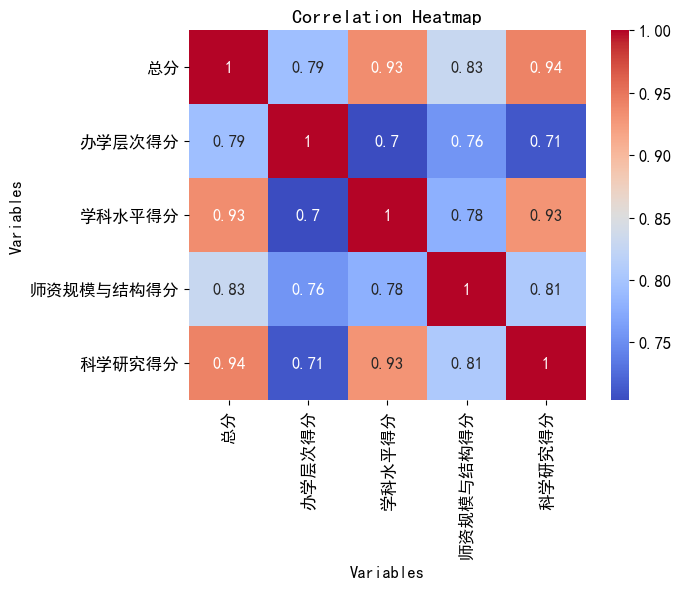

In [95]:
import matplotlib.pyplot as plt  
import seaborn as sns  
plt.rcParams['font.family'] = ['SimHei']  # 黑体字体  
plt.rcParams['font.size'] = 12  # 字体大小
correlation_matrix = df[['总分','办学层次得分','学科水平得分','师资规模与结构得分','科学研究得分']].corr()  

# 绘制热力图  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")  
  
# 添加标题和标签  
plt.title("Correlation Heatmap")  
plt.xlabel("Variables")  
plt.ylabel("Variables")  
  
# 显示图像  
# plt.show()

### 15 - 统计信息｜频率

In [149]:
# 计算各省市出现的次数
count=df['省市'].value_counts()
count[:2]

省市
北京    18
江苏    15
Name: count, dtype: int64

In [154]:
# count2=count.to_frame()
# count2.reset_index()

In [232]:
from pyecharts import options as opts  
from pyecharts.charts import Map  
map_chart.render("college_ranking_heatmap.html")
# 设置地图的基本属性  
map_chart = Map()  
map_chart.set_global_opts(  
    title_opts=opts.TitleOpts(title="各省市高校上榜数量热力地图"),  
    visualmap_opts=opts.VisualMapOpts(max_=50, is_piecewise=True),  
)
# 添加数据  
data = [("北京市", 20), ("上海市", 30), ("河北省", 10), ("广东省", 15), ("湖南省", 25)]  
# count=df['省市'].value_counts().to_frame().reset_index()
# count_list=[tuple(x) for x in count.values.tolist()][:5]
map_chart.add("ww", data, maptype="china")

In [185]:
type(('北京市', 20))

tuple

In [207]:
import pandas as pd  
  
# 创建一个DataFrame对象  
my_dataframe = pd.DataFrame({'A': [1, 2, 3], 'B': ['hello', 'world', '!']})  
  
# 将DataFrame转换为元组的数组  
my_tuple_array = tuple(my_dataframe.values.tolist())  
  
print(my_tuple_array)  # 输出：[(1, 'hello'), (2, 'world'), (3, '!')]

([1, 'hello'], [2, 'world'], [3, '!'])


In [148]:
my_tuple_array

([1, 'hello'], [2, 'world'], [3, '!'])

In [213]:
# 创建一个DataFrame  
df = pd.DataFrame({'col1': [1, 2, 3], 'col2': ['a', 'b', 'c']})  
  
# 将两列转换为元组的数组  
tuple_list = df.values.tolist()  # 获取两列的值并转换为列表  
tuple_arr = [tuple(x) for x in tuple_list]  # 将每个元素转换为元组  
  
print(tuple_arr)

[(1, 'a'), (2, 'b'), (3, 'c')]


In [212]:
tuple_list

[[1, 'a'], [2, 'b'], [3, 'c']]

In [214]:
df

,col1,col2
0,1,a
1,2,b
2,3,c


In [90]:
# df.index,df.columns

# print('你好')
